In [1]:
import numpy as np
import xray
import dask.array as daskarray
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import xgcm

In [3]:
iters = [2073600]
ddir = '/data/scratch/rpa/channel_moc/GCM/run'
ds1 = xgcm.open_mdsdataset(ddir, iters, deltaT=900, prefix=['DiagLAYERS-diapycnal'])
ds2 = xgcm.open_mdsdataset(ddir, iters, deltaT=900, prefix=['DiagLAYERS-transport'])

/home/rpa/xgcm/xgcm/mdsxray.py:247: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


In [4]:
# convergence from mass transport
vh = (ds2.LaVH1TH * ds2.dxG).mean(dim=('time','X')) 
diff_vh = np.diff(vh.values, axis=vh.get_axis_num('Yp1'))

wh = ((ds1.LaTz1TH + ds1.LaTs1TH)*ds1.rA).mean(dim=('time','X')) 
diff_wh = np.diff(wh.values, axis=wh.get_axis_num('_LAYERS_'))

<matplotlib.colorbar.Colorbar instance at 0x7fbac41f3908>

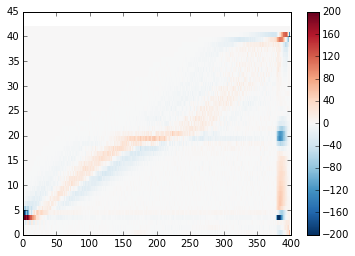

In [5]:
plt.pcolormesh(diff_vh, cmap='RdBu_r')
plt.clim([-200,200])
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fbac40344d0>

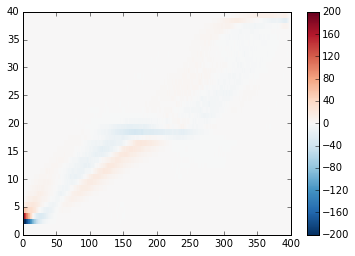

In [6]:
plt.pcolormesh(diff_wh, cmap='RdBu_r')
plt.clim([-200,200])
plt.colorbar()

In [7]:
print diff_vh.shape
print diff_wh.shape

(42, 399)
(40, 400)


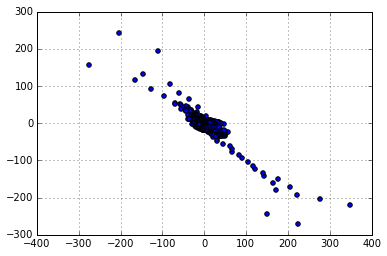

In [16]:
plt.scatter(diff_vh[1:-1,:-20], diff_wh[:,:-21])
plt.grid()

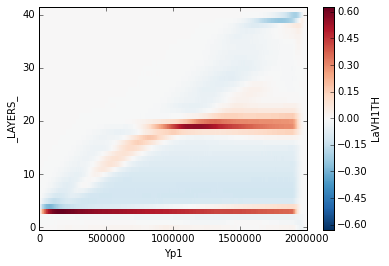

In [7]:
ds.LaVH1TH.mean(dim=('time','X')).plot()

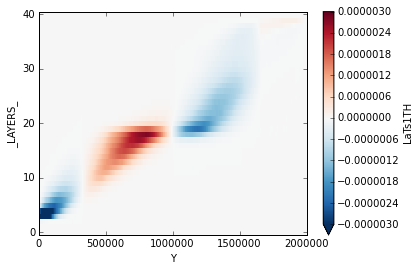

In [22]:
ds.LaTs1TH.mean(dim=('time','X')).plot(vmin=-3e-6, vmax=3e-6)

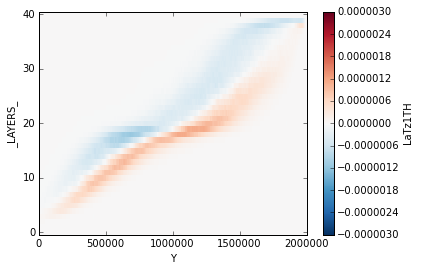

In [23]:
ds.LaTz1TH.mean(dim=('time','X')).plot(vmin=-3e-6, vmax=3e-6)